# Air transportation Ocurrences
## Summary Analysis 

In [36]:
%load_ext autoreload
%autoreload 2

In [37]:
import sys
sys.path.append("../scripts")

In [38]:
#Load data
from data_loader import load_data_from_csv, load_data_from_temp
from common.export_csv import exportDataVersion


In [39]:

df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2.csv': {len(df)}")

# of rows 'fullData_V2.csv': 47791


In [40]:
print(df.head())


    OccID   Latitude   Longitude CountryID_DisplayEng     OccDate  \
0  150172  46.284740  -63.644120               CANADA  2017-07-10   
1  150171  50.772778  -96.821389               CANADA  2017-07-10   
2  150170  37.638169 -122.375428        UNITED STATES  2017-07-08   
3  150169  48.650000  -93.500000               CANADA  2017-07-05   
4  150168  66.448611  -92.464444               CANADA  2017-07-02   

  OccIncidentTypeID_DisplayEng   OccTime OccTypeID_DisplayEng  \
0                          NaN  14:15:00             ACCIDENT   
1                   ENGINE (i)  13:55:00             INCIDENT   
2        RISK OF COLLISION (x)  06:56:00             INCIDENT   
3    DIFFICULT TO CONTROL (iv)  02:15:00             INCIDENT   
4                          NaN  22:00:00             ACCIDENT   

  ProvinceID_DisplayEng InitTSBNotifDate  ... AircraftTypeID_DisplayEng  \
0  PRINCE EDWARD ISLAND       2017-07-10  ...       ADVANCED ULTRALIGHT   
1              MANITOBA       2017-07-10  ..

In [41]:
print(df['Summary'])


0        C-IICE a privately operated Quad City Challeng...
1        C-GWCP a Piper PA-32-300 aircraft operated by ...
2        C-FKCK an Airbus 320-200 aircraft operated by ...
3        C-GJVC a Fairchild SA227-DC aircraft operated ...
4        C-GGSV an Aerospatiale AS 350 B-2 aircraft ope...
                               ...                        
47786    A76A0021: THE HARBOUR AREA WAS CLEAR TO THE NO...
47787    SHORTLY AFTER TAKE-OFF THE COCKPIT FILLED WITH...
47788    DURING TAKE-OFF FROM A BEACH AREA WHICH WAS HA...
47789    DURING TAKE-OFF IN GUSTY WIND CONDITIONS THE A...
47790    AFTER 45 MINUTES OF FLIGHT DURING WHICH TWO SL...
Name: Summary, Length: 47791, dtype: object


In [ ]:
!pip install nltk


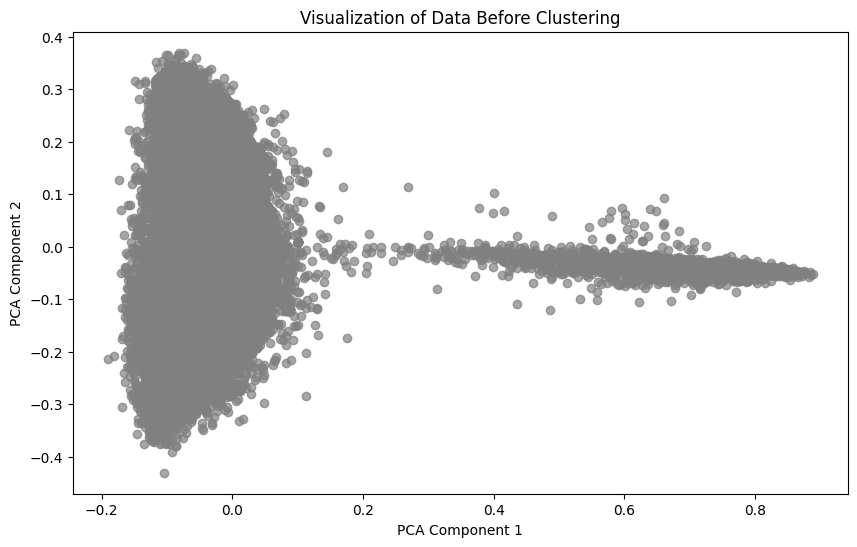

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense

# Create a scatter plot with a single color for all data points
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='gray', alpha=0.7)  # Single color
plt.title('Visualization of Data Before Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [43]:
print(df.columns)


Index(['OccID', 'Latitude', 'Longitude', 'CountryID_DisplayEng', 'OccDate',
       'OccIncidentTypeID_DisplayEng', 'OccTime', 'OccTypeID_DisplayEng',
       'ProvinceID_DisplayEng', 'InitTSBNotifDate', 'Summary',
       'InjuriesEnum_DisplayEng', 'AircraftTypeID_DisplayEng',
       'AircraftMakeID_DisplayEng', 'OrganizationID_DisplayEng',
       'OperatorTypeID_DisplayEng', 'WeightCategoryID_DisplayEng',
       'WakeTurbulenceCategoryID_DisplayEng', 'YearOfManuf', 'NumberOfEngine',
       'DamageLevelID_DisplayEng', 'OperationTypeID_DisplayEng'],
      dtype='object')


In [44]:
# Ensure no NaN values and convert text to lowercase
df['Cleaned_Summary'] = df['Summary'].fillna('').str.lower()

# Remove punctuation
import string
df['Cleaned_Summary'] = df['Cleaned_Summary'].str.translate(str.maketrans('', '', string.punctuation))


In [34]:
!pip install wordcloud


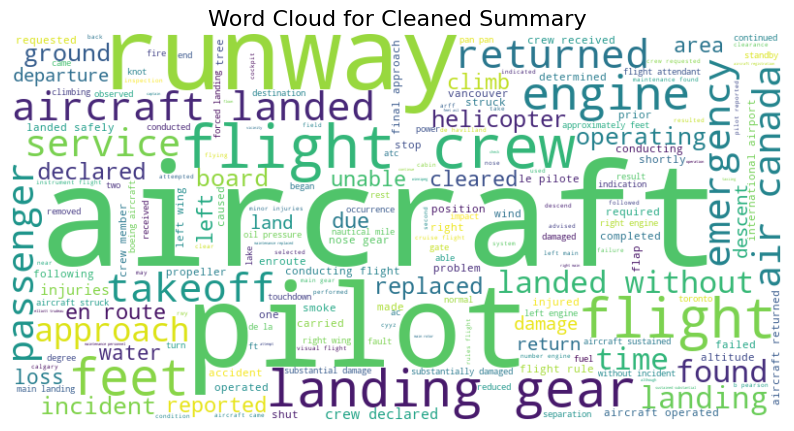

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the Cleaned_Summary column
text = ' '.join(df['Cleaned_Summary'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Cleaned Summary', fontsize=16)
plt.show()


In [46]:
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Remove stopwords
stop = set(stopwords.words('english'))
df['Cleaned_Summary'] = df['Cleaned_Summary'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop])
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the stopwords set
stop = set(stopwords.words('english'))

# Remove stopwords from the Cleaned_Summary column
df['Cleaned_Summary'] = df['Cleaned_Summary'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop])
)

# Preview the cleaned data
print(df['Cleaned_Summary'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    ciice privately operated quad city challenger ...
1    cgwcp piper pa32300 aircraft operated mha ente...
2    cfkck airbus 320200 aircraft operated air cana...
3    cgjvc fairchild sa227dc aircraft operated bear...
4    cggsv aerospatiale 350 b2 aircraft operated gr...
Name: Cleaned_Summary, dtype: object


In [26]:
pip install scikit-learn


  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.0 MB 13.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 16.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---- ----------------------------------- 5.0/44.8 MB 23.2 MB/s eta 0:00:02
   -------- ------------------------------- 10.0/44.8 MB 23.0 MB/s eta 0:00:02
   -------------- ------------------------- 16.0/44.8 MB 25.2 MB/s eta 0:00:02
   ------------------ --------------------- 21.0/44.8 MB 25.5 MB/s eta 0:00:01
   ------------------------ --------------- 27.0/44.8 MB 25.5 MB/s eta 0:00:01
   ----------------------------- ---------- 32.5/44.8 MB 25.8 MB/s eta 0:00:01
  

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Use top 1000 features
X = vectorizer.fit_transform(df['Cleaned_Summary'])

# Check the shape of the resulting matrix (rows = number of samples, columns = features)
print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (47791, 1000)


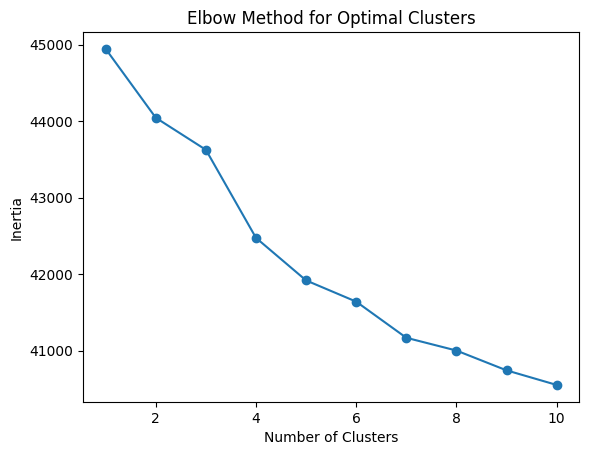

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different cluster numbers
inertia = []
k_values = range(1, 11)  # Try from 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your TF-IDF matrix
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


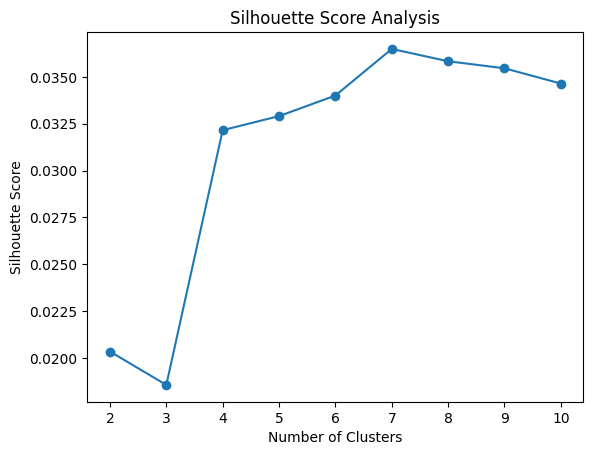

In [50]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your TF-IDF matrix
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Check the first few rows with cluster assignments
print(df[['Cleaned_Summary', 'Cluster']].head())


                                     Cleaned_Summary  Cluster
0  ciice privately operated quad city challenger ...        1
1  cgwcp piper pa32300 aircraft operated mha ente...        1
2  cfkck airbus 320200 aircraft operated air cana...        2
3  cgjvc fairchild sa227dc aircraft operated bear...        3
4  cggsv aerospatiale 350 b2 aircraft operated gr...        1


In [52]:
# Inspect sample rows for each cluster
for cluster_id in df['Cluster'].unique():
    print(f"\nCluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id]['Cleaned_Summary'].head(10))



Cluster 1:
0     ciice privately operated quad city challenger ...
1     cgwcp piper pa32300 aircraft operated mha ente...
4     cggsv aerospatiale 350 b2 aircraft operated gr...
6     cggct privately operated cessna 182m aircraft ...
9     cfbiy cessna 182f aircraft operated skydive ma...
15    cgqkn de havilland dhc6200 twin otter aircraft...
16    cfkzc cessna t210n operated orizon aviation qu...
18    cfswk privately operated champion 7ec aircraft...
20    cfnme privately operated cessna 208 caravan am...
22    cfeyp beech a100 aircraft operated air creebec...
Name: Cleaned_Summary, dtype: object

Cluster 2:
2     cfkck airbus 320200 aircraft operated air cana...
7     n910xj bombardier cl6002d24 crj 900 aircraft o...
12    tfisv boeing 757200 aircraft operated icelanda...
13    cgytl fairchild sa227cc aircraft operated bear...
26    cgjbq beech a100 operated strait air flight nu...
38    cgurm ​​a de havilland dhc8315 operated servic...
43    cgmwj boeing 737700 aircraft operated

In [53]:
# Define a mapping for clusters based on observed patterns
cluster_mapping = {
    0: "Crash",
    1: "Near Miss",
    2: "No Crash",
    3: "Mechanical Issue",
    4: "Other Incident"
}

# Map cluster labels to descriptive names
df['Incident_Type'] = df['Cluster'].map(cluster_mapping)

# Check the updated DataFrame
print(df[['Cleaned_Summary', 'Cluster', 'Incident_Type']].head())


                                     Cleaned_Summary  Cluster  \
0  ciice privately operated quad city challenger ...        1   
1  cgwcp piper pa32300 aircraft operated mha ente...        1   
2  cfkck airbus 320200 aircraft operated air cana...        2   
3  cgjvc fairchild sa227dc aircraft operated bear...        3   
4  cggsv aerospatiale 350 b2 aircraft operated gr...        1   

      Incident_Type  
0         Near Miss  
1         Near Miss  
2          No Crash  
3  Mechanical Issue  
4         Near Miss  


In [54]:
# Review the mapping for each cluster
for cluster_id in df['Cluster'].unique():
    print(f"\nCluster {cluster_id} - Incident Type: {cluster_mapping[cluster_id]}")
    print(df[df['Cluster'] == cluster_id][['Cleaned_Summary', 'Incident_Type']].head(5))



Cluster 1 - Incident Type: Near Miss
                                     Cleaned_Summary Incident_Type
0  ciice privately operated quad city challenger ...     Near Miss
1  cgwcp piper pa32300 aircraft operated mha ente...     Near Miss
4  cggsv aerospatiale 350 b2 aircraft operated gr...     Near Miss
6  cggct privately operated cessna 182m aircraft ...     Near Miss
9  cfbiy cessna 182f aircraft operated skydive ma...     Near Miss

Cluster 2 - Incident Type: No Crash
                                      Cleaned_Summary Incident_Type
2   cfkck airbus 320200 aircraft operated air cana...      No Crash
7   n910xj bombardier cl6002d24 crj 900 aircraft o...      No Crash
12  tfisv boeing 757200 aircraft operated icelanda...      No Crash
13  cgytl fairchild sa227cc aircraft operated bear...      No Crash
26  cgjbq beech a100 operated strait air flight nu...      No Crash

Cluster 3 - Incident Type: Mechanical Issue
                                      Cleaned_Summary     Incident_Typ

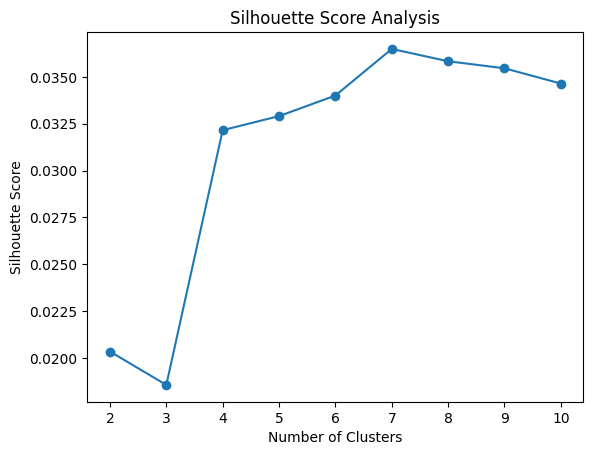

In [62]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your TF-IDF matrix
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Generate the TF-IDF matrix from the Cleaned_Summary column
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['Cleaned_Summary'])



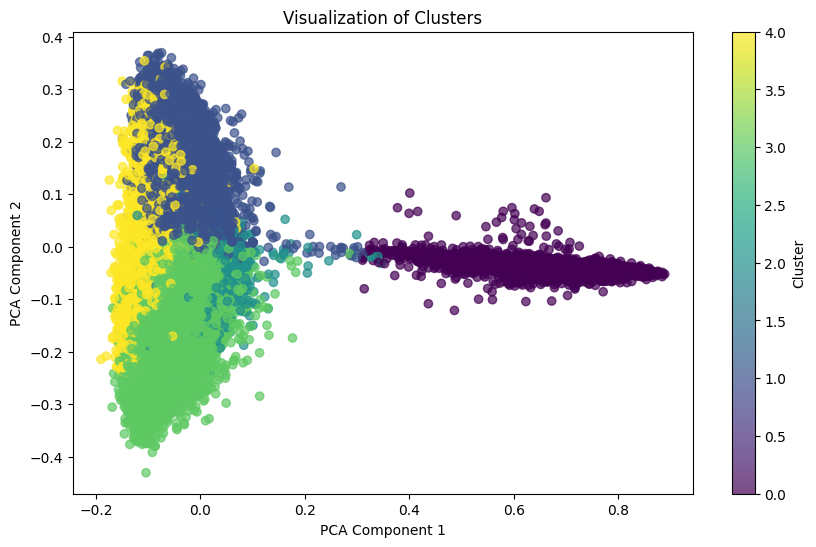

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [61]:
print(df['Cluster'].value_counts())


Cluster
1    18374
3    17933
2     5363
4     3696
0     2425
Name: count, dtype: int64


In [57]:
# Save the updated DataFrame to a CSV file
df.to_csv('updated_fullData_V2.csv', index=False)

print("Updated DataFrame saved as 'updated_fullData_V2.csv'")


Updated DataFrame saved as 'updated_fullData_V2.csv'


In [58]:
import os
print(os.getcwd())


C:\Users\Surya\OneDrive\Desktop\DA project\DataAnalysisProject\notebooks


In [59]:
# Reload the saved CSV file to check its content
import pandas
df_check = pandas.read_csv('updated_fullData_V2.csv')
print(df_check.head())


    OccID   Latitude   Longitude CountryID_DisplayEng     OccDate  \
0  150172  46.284740  -63.644120               CANADA  2017-07-10   
1  150171  50.772778  -96.821389               CANADA  2017-07-10   
2  150170  37.638169 -122.375428        UNITED STATES  2017-07-08   
3  150169  48.650000  -93.500000               CANADA  2017-07-05   
4  150168  66.448611  -92.464444               CANADA  2017-07-02   

  OccIncidentTypeID_DisplayEng   OccTime OccTypeID_DisplayEng  \
0                          NaN  14:15:00             ACCIDENT   
1                   ENGINE (i)  13:55:00             INCIDENT   
2        RISK OF COLLISION (x)  06:56:00             INCIDENT   
3    DIFFICULT TO CONTROL (iv)  02:15:00             INCIDENT   
4                          NaN  22:00:00             ACCIDENT   

  ProvinceID_DisplayEng InitTSBNotifDate  ... OperatorTypeID_DisplayEng  \
0  PRINCE EDWARD ISLAND       2017-07-10  ...                   PRIVATE   
1              MANITOBA       2017-07-10  ..

In [60]:
exportDataVersion(df, 3)

Version not allowed
